In [63]:
import os
import pandas as pd
import numpy as np
import gplearn as gp
from gplearn.genetic import SymbolicTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import graphviz
import pickle
from tqdm import tqdm

from importlib import reload
import feat_eng

# reload(feat_eng)
import feat_eng.preprocess as prep

os.chdir('/data1/jupyter/ficcdisk/baiyuhao/GA')

pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', 50000)

In [64]:
"""raed data"""
# data = pd.read_csv('../../agdt_data/agtd0101.csv')  # 训练
# data = pd.read_csv('../../baiyuhao/agdata/2021-4-12.csv')  # 测试
data = pd.read_csv('../../agdt_data/ag2106-q1.csv')  # 训练
data['tx_time'] = pd.to_datetime(data['tx_time'])
print(set(data['tx_time'].dt.date))
# print(data[:1])

{datetime.date(2021, 1, 12), datetime.date(2021, 2, 1), datetime.date(2021, 1, 7), datetime.date(2021, 3, 4), datetime.date(2021, 3, 22), datetime.date(2021, 1, 27), datetime.date(2021, 3, 25), datetime.date(2021, 3, 26), datetime.date(2021, 3, 5), datetime.date(2021, 3, 9), datetime.date(2021, 1, 18), datetime.date(2021, 1, 15), datetime.date(2021, 3, 1), datetime.date(2021, 3, 24), datetime.date(2021, 1, 5), datetime.date(2021, 3, 2), datetime.date(2021, 2, 18), datetime.date(2021, 2, 19), datetime.date(2021, 3, 17), datetime.date(2021, 1, 22), datetime.date(2021, 2, 8), datetime.date(2021, 3, 11), datetime.date(2021, 1, 4), datetime.date(2021, 2, 22), datetime.date(2021, 3, 23), datetime.date(2021, 2, 9), datetime.date(2021, 2, 26), datetime.date(2021, 1, 29), datetime.date(2021, 3, 10), datetime.date(2021, 3, 16), datetime.date(2021, 1, 20), datetime.date(2021, 1, 13), datetime.date(2021, 2, 23), datetime.date(2021, 3, 8), datetime.date(2021, 3, 3), datetime.date(2021, 1, 25), date

In [65]:
"""data process"""
# rule_type = '1S'
# data['tx_time'] = pd.to_datetime(data['tx_time'])
# data.set_index('tx_time', inplace=True)

# data_ = pd.DataFrame()

# for i in tqdm(range(1, 6)):
#     data_['best_bid_price_{}-0s'.format(i)] = (data['best_bid_price_{}'.format(i)].resample(rule=rule_type).mean() - 5431) / 198 
#     data_['best_bid_size_{}-0s'.format(i)] = (data['best_bid_size_{}'.format(i)].resample(rule=rule_type).mean() - 5431) / 198
#     data_['best_ask_price_{}-0s'.format(i)] = (data['best_ask_price_{}'.format(i)].resample(rule=rule_type).mean() - 5431) / 198
#     data_['best_ask_size_{}-0s'.format(i)] = (data['best_ask_size_{}'.format(i)].resample(rule=rule_type).mean() - 5431) / 198
    
# # data_['best_bid_price_1-0s'] = data['best_bid_price_1'].resample(rule=rule_type).mean()
# # data_['best_bid_price_2-0s'] = data['best_bid_price_2'].resample(rule=rule_type).mean()
# # data_['best_bid_price_3-0s'] = data['best_bid_price_3'].resample(rule=rule_type).mean()
# # data_['best_bid_price_4-0s'] = data['best_bid_price_4'].resample(rule=rule_type).mean()
# # data_['best_bid_price_5-0s'] = data['best_bid_price_5'].resample(rule=rule_type).mean()

# # data_['best_bid_size_1-0s'] = data['best_bid_size_1'].resample(rule=rule_type).mean()
# # data_['best_bid_size_2-0s'] = data['best_bid_size_2'].resample(rule=rule_type).mean()
# # data_['best_bid_size_3-0s'] = data['best_bid_size_3'].resample(rule=rule_type).mean()
# # data_['best_bid_size_4-0s'] = data['best_bid_size_4'].resample(rule=rule_type).mean()
# # data_['best_bid_size_5-0s'] = data['best_bid_size_5'].resample(rule=rule_type).mean()

# # data_['best_ask_price_1-0s'] = data['best_ask_price_1'].resample(rule=rule_type).mean()
# # data_['best_ask_price_2-0s'] = data['best_ask_price_2'].resample(rule=rule_type).mean()
# # data_['best_ask_price_3-0s'] = data['best_ask_price_3'].resample(rule=rule_type).mean()
# # data_['best_ask_price_4-0s'] = data['best_ask_price_4'].resample(rule=rule_type).mean()
# # data_['best_ask_price_5-0s'] = data['best_ask_price_5'].resample(rule=rule_type).mean()

# # data_['best_ask_size_1-0s'] = data['best_ask_size_1'].resample(rule=rule_type).mean()
# # data_['best_ask_size_2-0s'] = data['best_ask_size_2'].resample(rule=rule_type).mean()
# # data_['best_ask_size_3-0s'] = data['best_ask_size_3'].resample(rule=rule_type).mean()
# # data_['best_ask_size_4-0s'] = data['best_ask_size_4'].resample(rule=rule_type).mean()
# # data_['best_ask_size_5-0s'] = data['best_ask_size_5'].resample(rule=rule_type).mean()

# data['qty'] = (data['matchtot_qty'] - data['matchtot_qty'].shift(1)) / 10000
# data_['qty-0s'] = data['qty'].resample(rule=rule_type).sum() 

# for i in tqdm(range(1, 20)):
#     data_['qty-{}s'.format(i)] = data['qty'].resample(rule=rule_type).sum().shift(i)
#     for j in tqdm(range(1, 6)):
#         data_['best_bid_price_{}-{}s'.format(j, i)] = data_['best_bid_price_{}-0s'.format(j)].shift(i)
#         data_['best_bid_size_{}-{}s'.format(j, i)] = data_['best_bid_size_{}-0s'.format(j)].shift(i)
#         data_['best_ask_price_{}-{}s'.format(j, i)] = data_['best_ask_price_{}-0s'.format(j)].shift(i)
#         data_['best_ask_size_{}-{}s'.format(j, i)] = data_['best_ask_size_{}-0s'.format(j)].shift(i)
        
# for i in [5, 10, 20 ,60]:
#     data_['label+{}s'.format(i)] = data['last_price'].resample(rule=rule_type).last().shift(-i) - data['last_price'].resample(rule=rule_type).last()
     
# data = data_.dropna(how='any')
# print(data_.columns)  





'data process'

In [66]:
"""data process"""

data['qty'] = (data['matchtot_qty'] - data['matchtot_qty'].shift(1))

price_mean = data['last_price'].mean()
price_std = np.sqrt(data['last_price'].var())
print('price mean:{} std:{}'.format(price_mean, price_std))
      
qty_mean = data['qty'].mean()
qty_std = np.sqrt(data['qty'].var())
print('qty mean:{} std:{}'.format(qty_mean, qty_std))

rule_type = '1S'
data['tx_time'] = pd.to_datetime(data['tx_time'])
data['tx_time2'] = data['tx_time']
data.set_index('tx_time', inplace=True)

data_ = pd.DataFrame()



price mean:5445.0609588682855 std:199.27298735184817
qty mean:0.6998835733868053 std:2638.498549591127


In [67]:
"""添加tick指标特征工程"""
from feat_eng import tick
from feat_eng import base

trans = tick.MidPrice()
data = trans.fit_transform(data)

trans = tick.CashFlow()
data = trans.fit_transform(data)

trans = tick.VolDiff(n=1)  # 一档量差
data = trans.fit_transform(data)

trans = tick.VolDiff(n=2)
data = trans.fit_transform(data)

trans = tick.VolDiff(n=3)
data = trans.fit_transform(data)

trans = tick.VolDiffTot()
data = trans.fit_transform(data)

trans = tick.Slope()
data = trans.fit_transform(data)

data.tail()

data_[['mid_price', 'cash_flow_qty', 'vol_diff_1', 'vol_diff_2', 'vol_diff_3', 'vol_diff_tot', 'slope']] = data[['mid_price', 'cash_flow_qty', 'vol_diff_1', 'vol_diff_2', 'vol_diff_3', 'vol_diff_tot', 'slope']].resample(rule=rule_type).last()
data_['mid_price'] = (data_['mid_price'] - price_mean) / price_std



In [68]:
for i in tqdm(range(1, 6)):
    data_['best_bid_price_{}-0s'.format(i)] = (data['best_bid_price_{}'.format(i)].resample(rule=rule_type).last() - price_mean) / price_std 
    data_['best_bid_size_{}-0s'.format(i)] = (data['best_bid_size_{}'.format(i)].resample(rule=rule_type).last() - price_mean) / price_std
    data_['best_ask_price_{}-0s'.format(i)] = (data['best_ask_price_{}'.format(i)].resample(rule=rule_type).last() - price_mean) / price_std
    data_['best_ask_size_{}-0s'.format(i)] = (data['best_ask_size_{}'.format(i)].resample(rule=rule_type).last() - price_mean) / price_std

for i in tqdm(range(0, 5)):
    data_['qty-{}s'.format(i)] = (data['qty'].resample(rule=rule_type).sum().shift(i) - qty_mean)/ qty_std

    data_['open_-{}s'.format(i)] = (data['last_price'].resample(rule=rule_type).first().shift(i) - price_mean) / price_std 
    data_['high_-{}s'.format(i)] = (data['last_price'].resample(rule=rule_type).max().shift(i) - price_mean) / price_std
    data_['low_-{}s'.format(i)] = (data['last_price'].resample(rule=rule_type).min().shift(i) - price_mean) / price_std
    data_['close_-{}s'.format(i)] = (data['last_price'].resample(rule=rule_type).last().shift(i) - price_mean) / price_std 
        

for i in [5, 10, 20 ,60]:
    data_['label+{}s'.format(i)] = (data['last_price'].resample(rule=rule_type).mean().rolling(i).mean().shift(-i) - data['last_price'].resample(rule=rule_type).last()) / price_std

data_['tx_time'] = data['tx_time2'].resample(rule=rule_type).first()

data = data_.dropna(how='any')
print(data.columns)  
print(data.shape)

100%|██████████| 5/5 [00:12<00:00,  2.57s/it]


Index(['mid_price', 'cash_flow_qty', 'vol_diff_1', 'vol_diff_2', 'vol_diff_3',
       'vol_diff_tot', 'slope', 'best_bid_price_1-0s', 'best_bid_size_1-0s',
       'best_ask_price_1-0s', 'best_ask_size_1-0s', 'best_bid_price_2-0s',
       'best_bid_size_2-0s', 'best_ask_price_2-0s', 'best_ask_size_2-0s',
       'best_bid_price_3-0s', 'best_bid_size_3-0s', 'best_ask_price_3-0s',
       'best_ask_size_3-0s', 'best_bid_price_4-0s', 'best_bid_size_4-0s',
       'best_ask_price_4-0s', 'best_ask_size_4-0s', 'best_bid_price_5-0s',
       'best_bid_size_5-0s', 'best_ask_price_5-0s', 'best_ask_size_5-0s',
       'qty-0s', 'open_-0s', 'high_-0s', 'low_-0s', 'close_-0s', 'qty-1s',
       'open_-1s', 'high_-1s', 'low_-1s', 'close_-1s', 'qty-2s', 'open_-2s',
       'high_-2s', 'low_-2s', 'close_-2s', 'qty-3s', 'open_-3s', 'high_-3s',
       'low_-3s', 'close_-3s', 'qty-4s', 'open_-4s', 'high_-4s', 'low_-4s',
       'close_-4s', 'label+5s', 'label+10s', 'label+20s', 'label+60s',
       'tx_time'],
  

In [69]:
"""添加技术指标特征工程"""
from feat_eng import resample as rs
from feat_eng import ta
from sklearn.pipeline import make_pipeline

ma = ta.MA('close_-0s', n=6)
data = ma.fit_transform(data)

ema = ta.EMA('close_-0s', n=5)
data = ema.fit_transform(data)

trans = ta.MACD('close_-0s')
data = trans.fit_transform(data)

trans = ta.Bollin('close_-0s')
data = trans.fit_transform(data)

trans = ta.RSI('close_-0s')
data = trans.fit_transform(data)

trans = ta.OBV('qty-0s')
data = trans.fit_transform(data.assign(qty=data['qty-0s'].diff()))

trans = ta.BIAS('close_-0s')
data = trans.fit_transform(data)

# trans = make_pipeline(rs.OHLCSampler('1S'), ta.KDJ())
# data = trans.fit_transform(data['close_-0s'])

# trans = make_pipeline(rs.OHLCSampler('1S'), ta.CCI_A())
# data = trans.fit_transform(data['close_-0s']).query('cci_9 > 0')

# trans = make_pipeline(rs.OHLCSampler('1S'), ta.CCI_B())
# data = trans.fit_transform(data['close_-0s']).query('cci_9 > 0')

data = data.dropna(how='any')
print(data.shape)
print(data.columns)  

(492485, 69)
Index(['mid_price', 'cash_flow_qty', 'vol_diff_1', 'vol_diff_2', 'vol_diff_3',
       'vol_diff_tot', 'slope', 'best_bid_price_1-0s', 'best_bid_size_1-0s',
       'best_ask_price_1-0s', 'best_ask_size_1-0s', 'best_bid_price_2-0s',
       'best_bid_size_2-0s', 'best_ask_price_2-0s', 'best_ask_size_2-0s',
       'best_bid_price_3-0s', 'best_bid_size_3-0s', 'best_ask_price_3-0s',
       'best_ask_size_3-0s', 'best_bid_price_4-0s', 'best_bid_size_4-0s',
       'best_ask_price_4-0s', 'best_ask_size_4-0s', 'best_bid_price_5-0s',
       'best_bid_size_5-0s', 'best_ask_price_5-0s', 'best_ask_size_5-0s',
       'qty-0s', 'open_-0s', 'high_-0s', 'low_-0s', 'close_-0s', 'qty-1s',
       'open_-1s', 'high_-1s', 'low_-1s', 'close_-1s', 'qty-2s', 'open_-2s',
       'high_-2s', 'low_-2s', 'close_-2s', 'qty-3s', 'open_-3s', 'high_-3s',
       'low_-3s', 'close_-3s', 'qty-4s', 'open_-4s', 'high_-4s', 'low_-4s',
       'close_-4s', 'label+5s', 'label+10s', 'label+20s', 'label+60s',
       '

In [8]:
# 查看基础因子对差值的相关性
# corr = data.corr('spearman')
# sns.heatmap(corr)

In [9]:
# corr['delta'].sort_values().plot.barh()

In [10]:
# 查看各个基础因子的名称
# data.columns

In [46]:
# 将数据分为训练集和测试集


features = data.columns.drop(['tx_time', 'label+5s', 'label+10s', 'label+20s', 'label+60s'])
x_train, x_test, y_train, y_test = train_test_split(data[features], data['label+60s'].to_frame(), 
                                                    test_size=0.8, shuffle=False, random_state=5)

_, _, _, x_time = train_test_split(data[features], data['tx_time'].to_frame(), 
                                                    test_size=0.8, shuffle=False, random_state=5)


In [47]:
# 建立初始的遗传规划模型
# 自定义函数, make_function函数群
from gplearn.functions import make_function
from scipy.stats import rankdata

def _rolling_rank(data):
    value = rankdata(data)[-1]
    return value


def _rolling_prod(data):
    return np.prod(data) #连乘


def _ts_sum(data):
    window = 10
    value = np.array(pd.Series(data.flatten()).rolling(window).sum().tolist())
    value = np.nan_to_num(value)
    return value


def _sma(data):
    window = 10
    value = np.array(pd.Series(data.flatten()).rolling(window).mean().tolist())
    value = np.nan_to_num(value)

    return value


def _stddev(data):
    window = 10
    value = np.array(pd.Series(data.flatten()).rolling(window).std().tolist())
    value = np.nan_to_num(value)

    return value


def _ts_rank(data):
    window = 10
    value = np.array(pd.Series(data.flatten()).rolling(10).apply(_rolling_rank).tolist())
    value = np.nan_to_num(value)

    return value


def _product(data):
    window = 10
    value = np.array(pd.Series(data.flatten()).rolling(10).apply(_rolling_prod).tolist())
    value = np.nan_to_num(value)

    return value


def _ts_min(data):
    window = 10
    value = np.array(pd.Series(data.flatten()).rolling(window).min().tolist())
    value = np.nan_to_num(value)

    return value


def _ts_max(data):
    window = 10
    value = np.array(pd.Series(data.flatten()).rolling(window).max().tolist())
    value = np.nan_to_num(value)

    return value


def _delta(data):
    value = np.diff(data.flatten())
    value = np.append(0, value)

    return value


def _delay(data):
    period = 1
    value = pd.Series(data.flatten()).shift(1)
    value = np.nan_to_num(value)

    return value


def _rank(data):
    value = np.array(pd.Series(data.flatten()).rank().tolist())
    value = np.nan_to_num(value)

    return value


def _scale(data):
    k = 1
    data = pd.Series(data.flatten())
    value = data.mul(1).div(np.abs(data).sum())
    value = np.nan_to_num(value)

    return value


def _ts_argmax(data):
    window = 10
    value = pd.Series(data.flatten()).rolling(10).apply(np.argmax) + 1
    value = np.nan_to_num(value)

    return value


def _ts_argmin(data):
    window = 10
    value = pd.Series(data.flatten()).rolling(10).apply(np.argmin) + 1
    value = np.nan_to_num(value)

    return value


# make_function函数群
delta = make_function(function=_delta, name='delta', arity=1)
delay = make_function(function=_delay, name='delay', arity=1)
rank = make_function(function=_rank, name='rank', arity=1)
scale = make_function(function=_scale, name='scale', arity=1)
sma = make_function(function=_sma, name='sma', arity=1)
stddev = make_function(function=_stddev, name='stddev', arity=1)
product = make_function(function=_product, name='product', arity=1)
ts_rank = make_function(function=_ts_rank, name='ts_rank', arity=1)
ts_min = make_function(function=_ts_min, name='ts_min', arity=1)
ts_max = make_function(function=_ts_max, name='ts_max', arity=1)
ts_argmax = make_function(function=_ts_argmax, name='ts_argmax', arity=1)
ts_argmin = make_function(function=_ts_argmin, name='ts_argmin', arity=1)
ts_sum = make_function(function=_ts_sum, name='ts_sum', arity=1)

# user_function = [delta, delay, rank, scale, sma, stddev, product, ts_rank, ts_min, ts_max, ts_argmax, ts_argmin, ts_sum]
user_function = [sma, scale, stddev]

# function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min']
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'inv']

#function_set = function_set + user_function

gp1 = SymbolicTransformer(feature_names=features,
                         generations=30, population_size=10000,
                         hall_of_fame=1000, n_components=10,
                         function_set=function_set,
                         p_crossover=0.64,
                         p_subtree_mutation=0.12,
                         p_hoist_mutation=0.12,
                         p_point_mutation=0.12,
                         metric = 'spearman',
                         parsimony_coefficient=0.0001,
                         max_samples=1, verbose=1,
                         random_state=0, n_jobs=64)

In [13]:
# 开始训练
# gp1.fit(x_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left


/dev/shm/Anaconda3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


   0    10.87        0.0134754        3         0.269027              N/A    166.07m
   1     8.05        0.0520369        7         0.278253              N/A    123.05m
   2     5.36         0.120725        5         0.291756              N/A    111.49m
   3     5.45         0.166423        5         0.291756              N/A     99.41m
   4     3.83           0.1786       14         0.294172              N/A     89.52m
   5     5.20         0.178203        9         0.298278              N/A     92.09m
   6     5.47         0.192846       13         0.298591              N/A     90.92m
   7     7.28         0.203802       20         0.300818              N/A     90.36m
   8     9.71         0.202151       20         0.300818              N/A     89.39m
   9    11.77         0.207754       20         0.300818              N/A     87.53m
  10    13.55         0.213652       20         0.300852              N/A     84.65m
  11    13.41         0.218974       20         0.300951         

SymbolicTransformer(feature_names=Index(['mid_price', 'cash_flow_qty', 'vol_diff_1', 'vol_diff_2', 'vol_diff_3',
       'vol_diff_tot', 'slope', 'best_bid_price_1-0s', 'best_bid_size_1-0s',
       'best_ask_price_1-0s', 'best_ask_size_1-0s', 'best_bid_price_2-0s',
       'best_bid_size_2-0s', 'best_ask_price_2-0s', 'best_ask_size_2-0s',
       'best_bid_price_3-0s', 'best_bid_size_3-0s', 'bes...
       'lower_close_-0s_9_2', 'rsi_close_-0s_9', 'qty', 'obv_qty-0s',
       'bias_close_-0s_9'],
      dtype='object'),
                    function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'inv'],
                    generations=30, hall_of_fame=1000, max_samples=1,
                    metric='spearman', n_jobs=64, p_crossover=0.64,
                    p_hoist_mutation=0.12, p_point_mutation=0.12,
                    p_subtree_mutation=0.12, parsimony_coefficient=0.0001,
                    population_size=10000, random_state=0, verbose=1)

In [14]:
# 保存模型
with open('gp_model.pkl', 'wb') as f:
    pickle.dump(gp1, f)

In [48]:
# 加载模型
gp1 = pickle.load(open('gp_model.pkl', 'rb'))

In [49]:
# 将结果集放入一个字典
best_programs = gp1._best_programs
best_programs_dict = {}

for p in best_programs:
    factor_name = 'alpha_' + str(best_programs.index(p) + 1)
    best_programs_dict[factor_name] = {'fitness':p.fitness_, 'expression':str(p), 'depth':p.depth_, 'length':p.length_}
     
best_programs_dict = pd.DataFrame(best_programs_dict).T
best_programs_dict = best_programs_dict.sort_values(by='fitness', ascending=False)
best_programs_dict 

,fitness,expression,depth,length
alpha_6,0.304202,"sub(div(sub(close_-0s, best_bid_price_2-0s), s...",5,12
alpha_7,0.304202,"sub(div(sub(close_-0s, best_bid_price_2-0s), s...",5,12
alpha_8,0.304202,"sub(div(sub(close_-0s, best_bid_price_2-0s), s...",5,12
alpha_9,0.304202,"sub(div(sub(close_-0s, best_bid_price_2-0s), s...",5,12
alpha_10,0.304202,"sub(div(sub(close_-0s, best_bid_price_2-0s), s...",5,12
alpha_4,0.304134,"sub(div(sub(close_-0s, best_bid_price_2-0s), s...",6,13
alpha_2,0.304034,"sub(div(sub(close_-0s, best_bid_price_2-0s), s...",7,14
alpha_3,0.303934,"sub(div(sub(close_-0s, best_bid_price_2-0s), s...",8,15
alpha_1,0.303734,"sub(div(sub(close_-0s, best_bid_price_2-0s), s...",10,17
alpha_5,0.303319,"sub(div(sub(div(sub(close_-0s, best_bid_price_...",6,21


In [50]:
# 将公式输出为公式树格式
def alpha_factor_graph(num):
    # 打印指定num的表达式图
    factor = best_programs[num-1]
    print(factor)
    print('fitness: {0}, depth: {1}, length: {2}'.format(factor.fitness_, factor.depth_, factor.length_))

#     dot_data = factor.export_graphviz()
#     graph = graphviz.Source(dot_data)
#     graph.render('images/alpha_factor_graph', format='png', cleanup=True)
    
#     return graph

for i in range(10):
    graph1 = alpha_factor_graph(i)
    print()

sub(div(sub(close_-0s, best_bid_price_2-0s), sqrt(sqrt(sqrt(best_ask_size_1-0s)))), sub(best_ask_price_2-0s, close_-0s))
fitness: 0.3042022987089461, depth: 5, length: 12

sub(div(sub(close_-0s, best_bid_price_2-0s), sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(best_ask_size_1-0s))))))))), sub(best_ask_price_2-0s, close_-0s))
fitness: 0.30373422547205103, depth: 10, length: 17

sub(div(sub(close_-0s, best_bid_price_2-0s), sqrt(sqrt(sqrt(sqrt(sqrt(best_ask_size_1-0s)))))), sub(best_ask_price_2-0s, close_-0s))
fitness: 0.30403405651307597, depth: 7, length: 14

sub(div(sub(close_-0s, best_bid_price_2-0s), sqrt(sqrt(sqrt(sqrt(sqrt(sqrt(best_ask_size_1-0s))))))), sub(best_ask_price_2-0s, close_-0s))
fitness: 0.3039340329379419, depth: 8, length: 15

sub(div(sub(close_-0s, best_bid_price_2-0s), sqrt(sqrt(sqrt(sqrt(best_ask_size_1-0s))))), sub(best_ask_price_2-0s, close_-0s))
fitness: 0.30413394212251516, depth: 6, length: 13

sub(div(sub(div(sub(close_-0s, best_bid_price_2-0s), sqrt(sub(best_ask

In [51]:
# 利用训练好的模型对训练集和测试机分别进行预测新因子
# 将新生成的因子加入训练集和测试集中来
gp_train_feature = gp1.transform(x_train)
gp_test_feature = gp1.transform(x_test)

new_feature_name = [str(i)+'V' for i in range(1, 11)]
train_new_feature = pd.DataFrame(gp_train_feature, columns=new_feature_name, index=x_train.index)
test_new_feature = pd.DataFrame(gp_test_feature, columns=new_feature_name, index=x_test.index)

train_0 = pd.concat([train_new_feature, y_train], axis=1)
test_0 = pd.concat([test_new_feature, y_test], axis=1)
# train_0 = pd.concat([x_train, train_new_feature, y_train], axis=1)
# test_0 = pd.concat([x_test, test_new_feature, y_test], axis=1)

new_data = pd.concat([train_0, test_0], axis=0)
# new_data = pd.concat([data['Y'], new_x_data], axis=1)
new_data.columns

Index(['1V', '2V', '3V', '4V', '5V', '6V', '7V', '8V', '9V', '10V',
       'label+60s'],
      dtype='object')

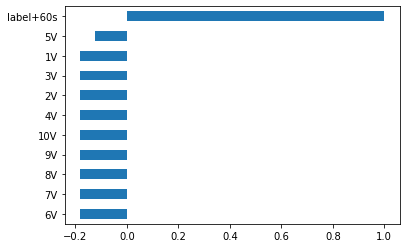

In [52]:
# 查看训练集各个因子与差值的相关程度
corr = train_0.corr('pearson')

corr['label+60s'].sort_values().plot.barh()

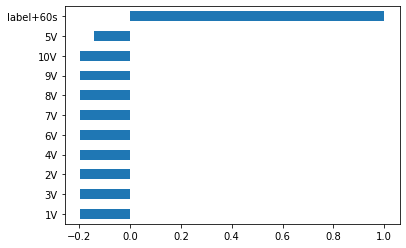

In [53]:
# 查看测试集各个因子与差值的相关程度
corr = test_0.corr('pearson')
corr['label+60s'].sort_values().plot.barh()

In [54]:
test_0 = pd.concat([x_time, test_0], axis=1)

ic = []
for i in range(1, 11):
    i_ic = []
    for key, group in test_0.groupby(test_0['tx_time'].dt.date):
        i_ic.append(abs(group['{}V'.format(i)].corr(group['label+60s'])))
    ic.append(i_ic)

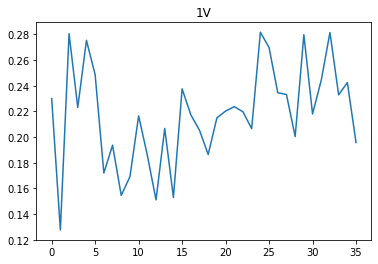

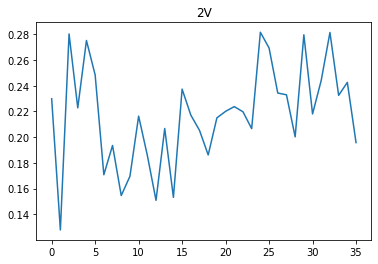

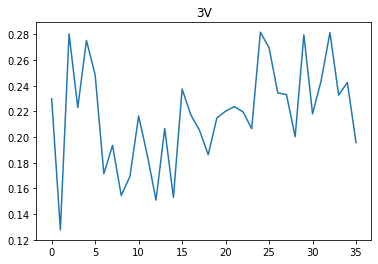

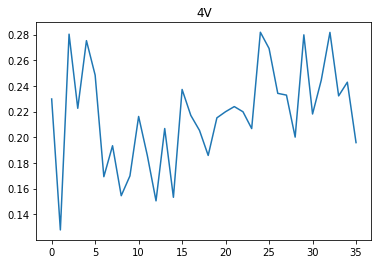

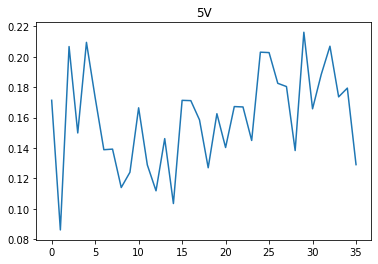

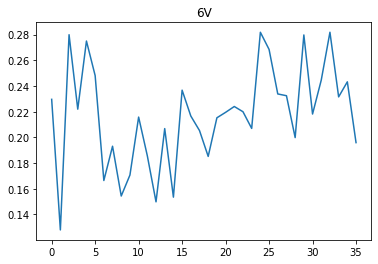

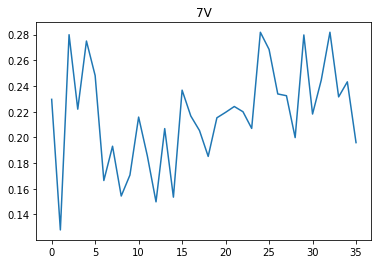

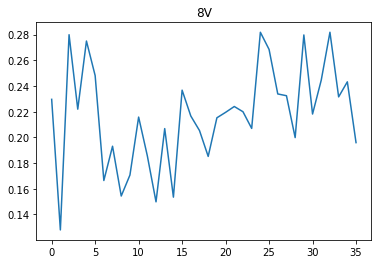

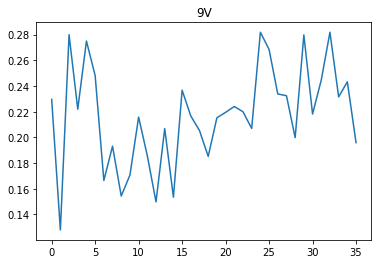

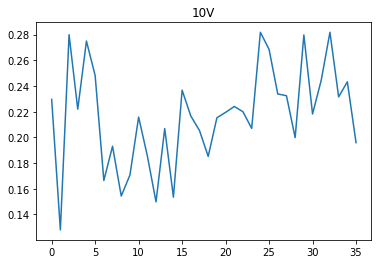

In [55]:
# print(ic)
# ic = np.array(ic)
# print(np.mean(ic))
# print(np.sqrt(np.var(ic)))
# print(np.mean(ic)/np.sqrt(np.var(ic)))
for i in range(10):
    plt.title('{}V'.format(i+1))
    plt.plot(np.arange(len(ic[i])), ic[i])
    plt.show()

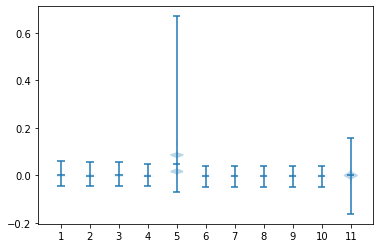

In [56]:
# 因子分布箱型图
fig, ax = plt.subplots()
test_0 = test_0[test_0.columns.drop(['tx_time'])]
ax.violinplot([test_0[col] for col in test_0],
                  showmeans=False,
                  showmedians=True)
ax.set_xticks([y + 1 for y in range(test_0.shape[1])])
plt.show()

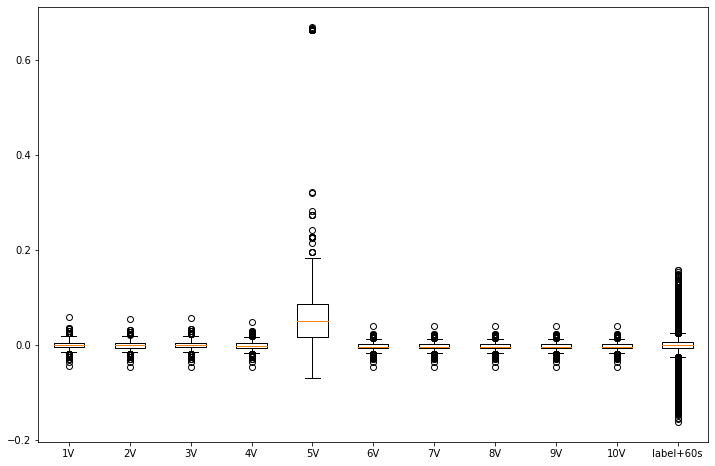

In [57]:
# 因子分布箱型图
# test_0 = test_0[test_0.columns.drop(['tx_time'])]
def plot_boxplot(df):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.boxplot([test_0[col] for col in test_0],
               showmeans=False,
               labels=df.columns)
    plt.show()
plot_boxplot(test_0)

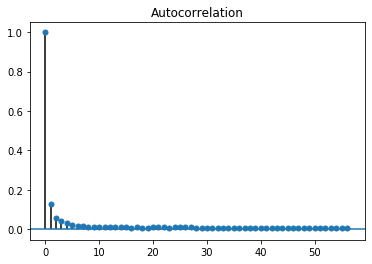

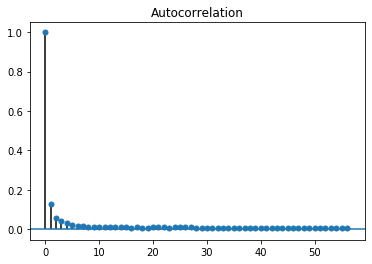

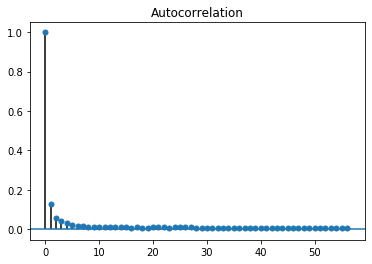

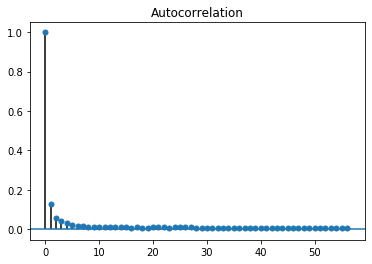

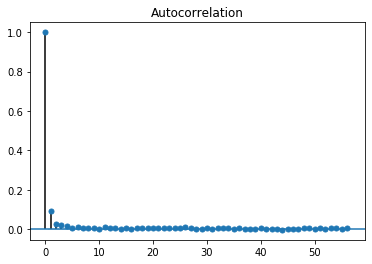

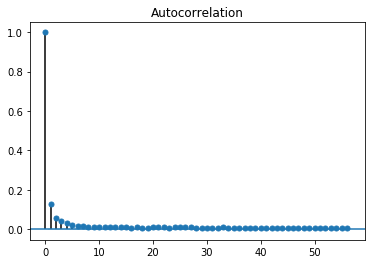

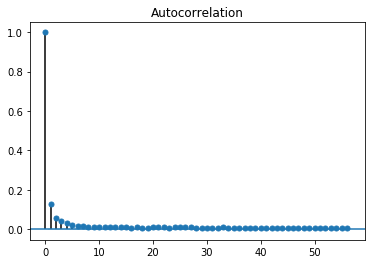

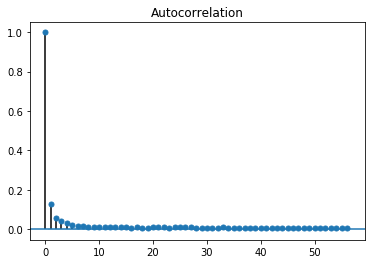

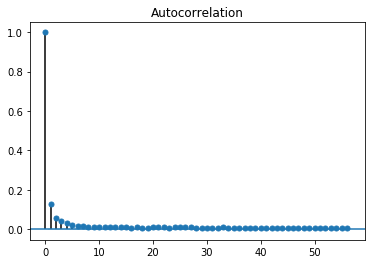

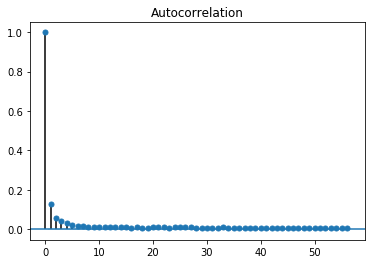

In [58]:
# 因子自相关性
def plot_acf(factor):
    from statsmodels.graphics.tsaplots import plot_acf as pacf
    
    pacf(factor)
    plt.show()
    
for i in range(1, 11):    
    plot_acf(test_0['{}V'.format(i)])

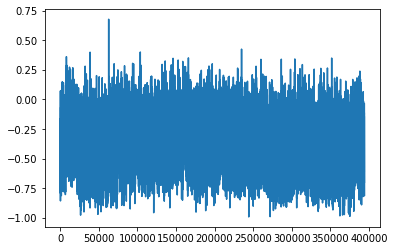

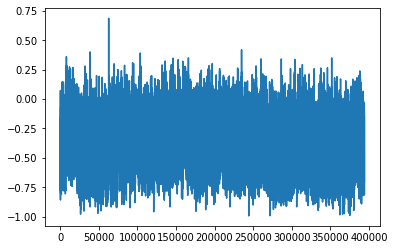

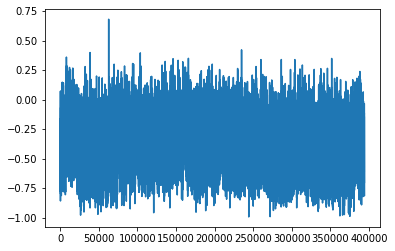

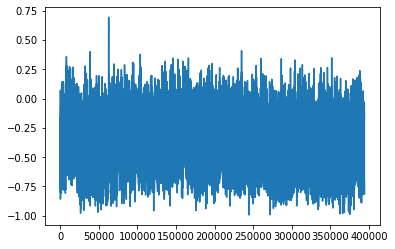

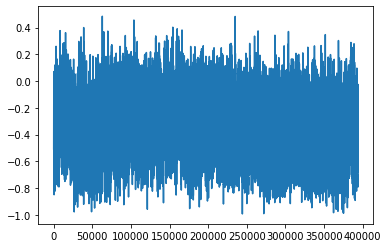

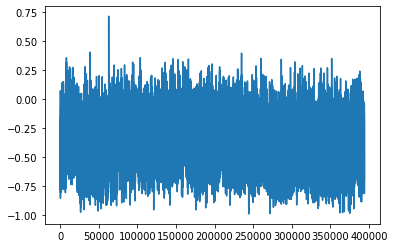

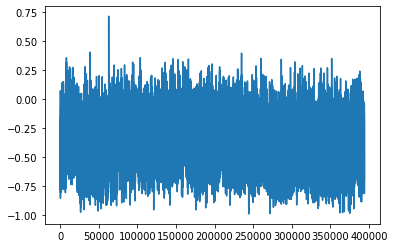

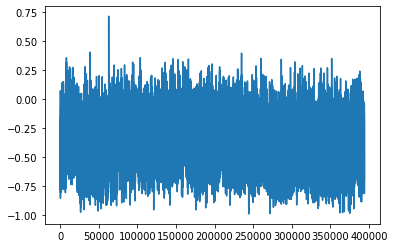

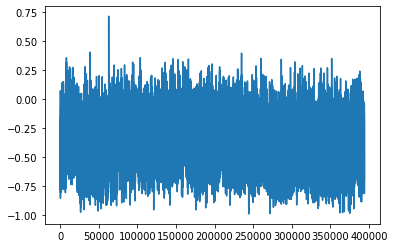

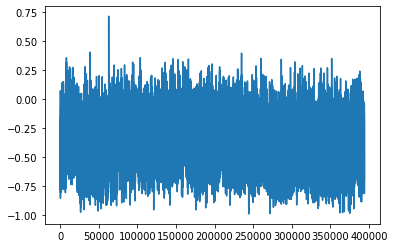

In [59]:
# 计算rolling IC

def get_roll_ic(factor, prices, n=60, win=50):
    ret = prices  # prices.shift(-n) / prices - 1
    res = factor.rolling(win).agg(lambda x: pd.concat([ret[x.index], x], axis=1).corr().iloc[1,0])
    return res

a = []
for i in range(1, 11):
    a.append(get_roll_ic(test_0['{}V'.format(i)], test_0['label+60s']))
    plt.plot(np.arange(len(a[i-1])), a[i-1])
    plt.show()

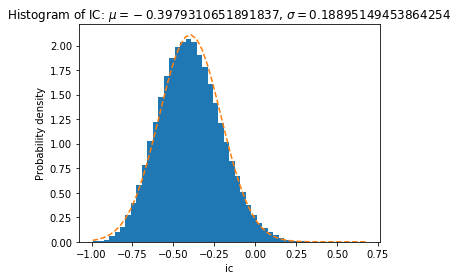

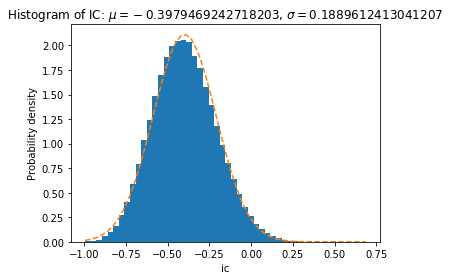

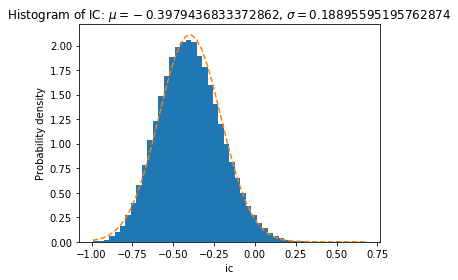

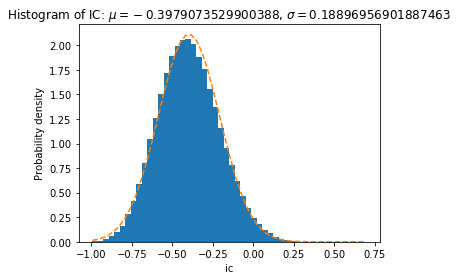

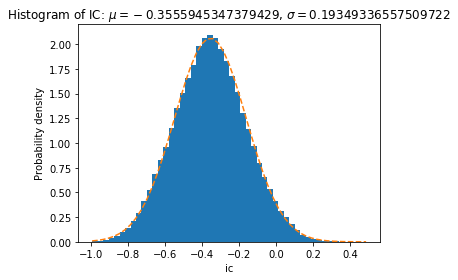

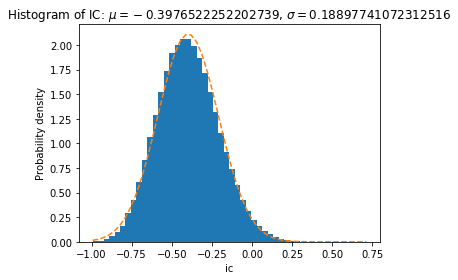

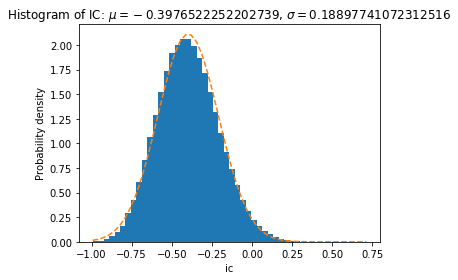

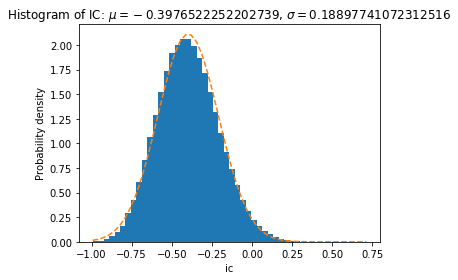

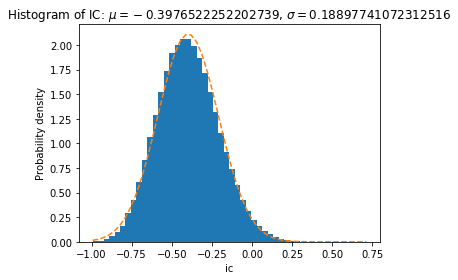

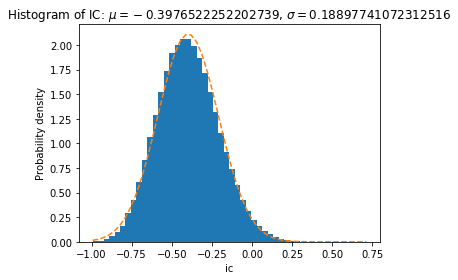

In [60]:
# rolling IC分布图
def plot_hist(ic, num_bins=50, xtitle='ic'):
    num_bins = num_bins

    fig, ax = plt.subplots()

    # the histogram of the data
    n, bins, patches = ax.hist(ic, num_bins, density=True)
    mu = ic.mean()  # mean of distribution
    sigma = ic.std()  # standard deviation of distribution

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    ax.set_xlabel(xtitle)
    ax.set_ylabel('Probability density')
    ax.set_title(rf'Histogram of IC: $\mu={mu}$, $\sigma={sigma}$')

    # Tweak spacing to prevent clipping of yla
    fig.tight_layout()
    plt.show()
    
for i in range(10):
    plot_hist(a[i])


In [61]:
 def plot_line(factor):
    fig, ax = plt.subplots(figsize=(12, 6))
    factor.plot(ax=ax)
    plt.show()
        
for i in range(10):
    f = a[i].dropna().reset_index()[a[i].dropna().reset_index().columns.drop(['tx_time'])]
    hf = f.expanding().agg(lambda x: x.iloc[-1] / x.iloc[0] <= 0.5)
    # rolling IC 折线图
    plot_line(f)

KeyboardInterrupt: 

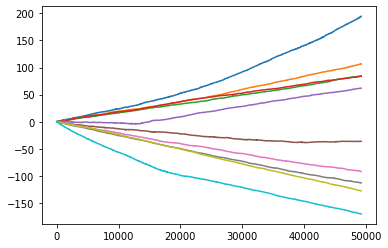

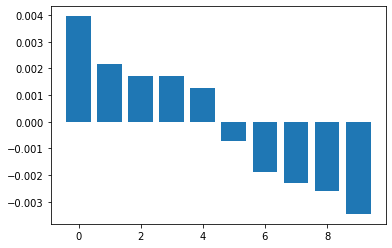

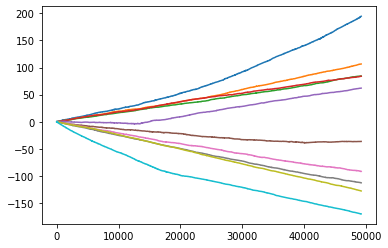

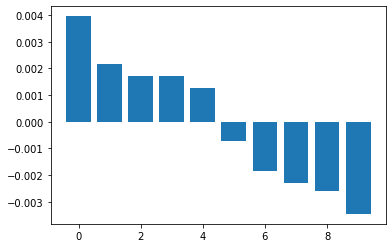

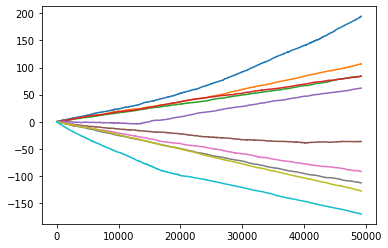

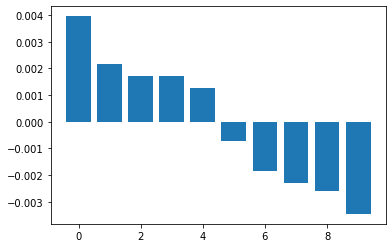

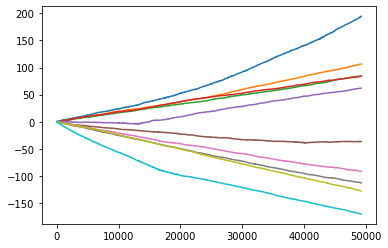

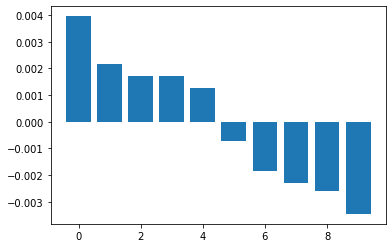

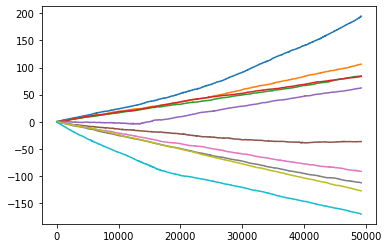

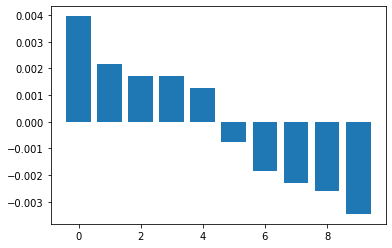

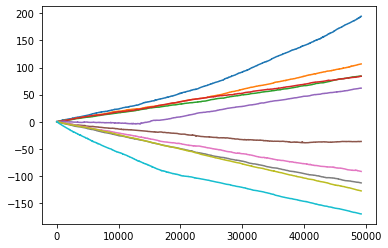

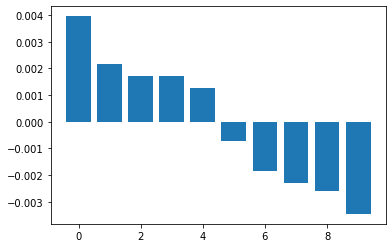

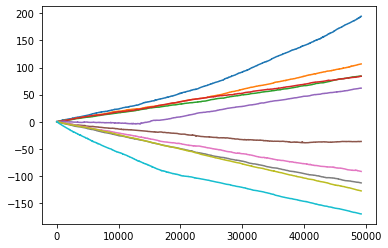

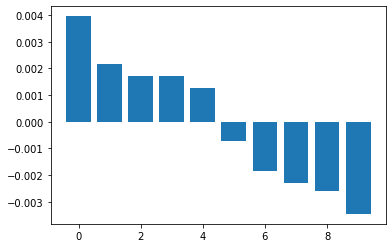

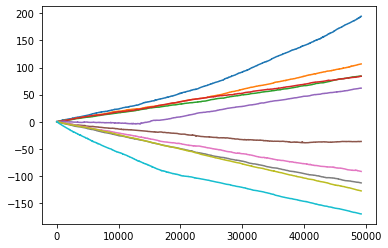

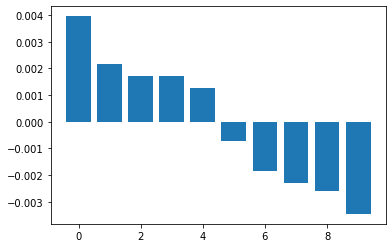

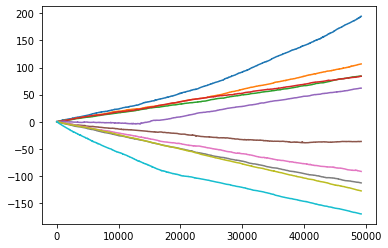

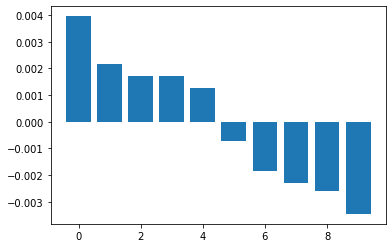

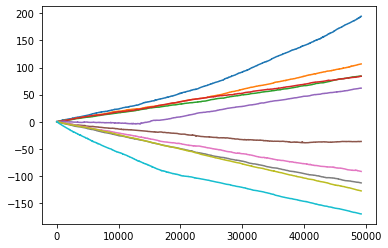

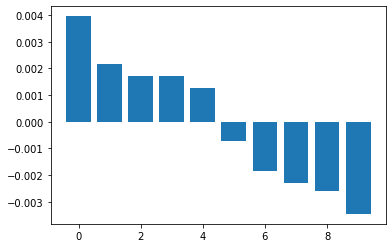

In [62]:
for i in range(1, 11):
    n= 10
    gain = np.zeros(n)

    iv = new_data[['{}V'.format(i), 'label+60s']]
    iv = iv.sort_values(by=['{}V'.format(i)], ascending=0)
    iv['pct_rank'] = iv['{}V'.format(i)].rank(ascending=True, method='first', pct=True)
    
    for i in range(n):
        iv_ = iv[(iv['pct_rank'] < (i+1)/n) & (iv['pct_rank'] > i/n)]
        gain[i] = iv_['label+60s'].mean()

        plt.plot(np.arange(iv_['label+60s'].cumsum().shape[0]), iv_['label+60s'].cumsum())
    plt.show()
    plt.bar(np.arange(len(gain)), gain)
    plt.show()